In [22]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import cv2 as cv

[-3. -2. -1.  0.  1.  2.]


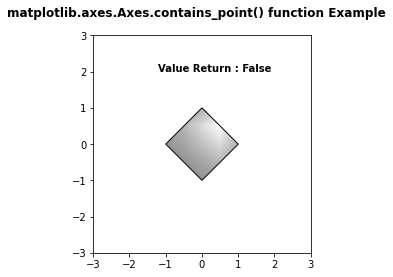

In [20]:
delta = 1
x = y = np.arange(-3.0, 3.0, delta)
print (x)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2


path = Path([[0, 1], [1, 0], [0, -1], 
             [-1, 0], [0, 1]])
patch = PathPatch(path, facecolor ='none')
  
fig, ax = plt.subplots()
ax.add_patch(patch)
  
im = ax.imshow(Z,
               interpolation ='bilinear',
               cmap = cm.gray,
               origin ='lower', 
               extent =[-3, 3, -3, 3],
               clip_path = patch, 
               clip_on = True)
  
#im.set_clip_path(patch)
  
ax.text(-1.2, 2,
        "Value Return : "+ str(path.contains_point([0, 2])),
        fontweight ="bold", 
        fontsize = 10)
  
fig.suptitle('matplotlib.axes.Axes.contains_point() \
function Example', fontweight ="bold")
  
plt.show()

printing mask again



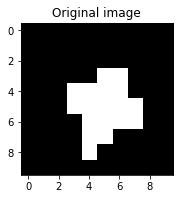

In [77]:
def get_mask(shape, path):
        """Return image mask given by mask creator"""
        h, w = shape
        y, x = np.mgrid[:h, :w]
        points = np.transpose((x.ravel(), y.ravel()))

        mask = path.contains_points( points )

        return mask.reshape(h, w)

img = np.zeros((10,10), np.uint8)
cv.circle(img, (0,0), 1, 255)
img[:] = 255

path = Path([[2,4], [4,8], [8,6], 
             [6,2], [2,4]])
patch = PathPatch(path, facecolor ='none')

# x = np.arange(0, 10)
# y = np.arange(0, 10)

# print ("x = {}".format(x))
# X, Y = np.meshgrid(x, y, indexing='xy' )
# print ("X = {}".format(X))

# # print ("reshaped X = {}".format(X.reshape(-1, 1)))

# points = np.hstack((X.reshape((-1,1)), Y.reshape((-1,1))))
# # print(points)
# mask = path.contains_points(points)
# print ("\n mask")
# print (mask)

# mask.shape = X.shape
# print (mask.dtype)
mask = get_mask(img.shape, path)
img[~mask] = 0
print("printing mask again\n")
# print (mask)
# print (img.reshape(25))

# mask = path.contains_points(img.ravel())
# fig, ax = plt.subplot(121)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title("Original image")
# plt.xticks([])
# plt.yticks([])
plt.show()


